In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
import os
import pickle
from matplotlib.colors import ListedColormap

from classes import boundaries as bd
from classes import functions as fcy
from classes import snag_MTF_func as sg


plot_setup = bd.plot_setup()
params = {'mathtext.default':'regular'}
plt.rcParams.update(params)

%matplotlib inline
%config Completer.use_jedi = False 



#--- Settings
climate_data_list  = ['CRUclim','CRUNCEPv7','CHELSA30s','WorldClim30s','WorldClim10m',]
climate_data       = climate_data_list[1]
mtf_type           = 'count'

In [3]:
#-----------------#
#   Import data   #
#-----------------#



#--- Site MTF
mtf_site = sg.MTF_database_import('data/MTF_database.xlsx','Site_MTF')

# Select data
mtf_site_ss = mtf_site[['Reference', 'MTF basis', 'MTF', 'DBH mean','Mortality']].copy()
mtf_site_ss['MAT'] = mtf_site.loc[:,(climate_data,'MAT')]
mtf_site_ss.MTF = mtf_site_ss.MTF.apply(np.log)
mtf_site_ss     = mtf_site_ss[mtf_site_ss.Reference != 'Ritchie2014EstablishmentForest'].copy()
mtf_site_ss     = mtf_site_ss[mtf_site_ss.Reference != 'Campbell2016CarbonStates'].copy()
mtf_site_ss     = mtf_site_ss[mtf_site_ss['MTF basis'] == 'count']


#--- Species MTF
species_mtf = sg.MTF_database_import('data/MTF_database.xlsx','Species_MTF')

# Select data
species_mtf_ss = species_mtf[['Reference', 'MTF basis', 'MTF', 'DBH mean','Mortality']].copy()
species_mtf_ss['MAT'] = species_mtf.loc[:,(climate_data,'MAT')]
mtf_spe_ss = species_mtf_ss.copy()
mtf_spe_ss.MTF = mtf_spe_ss.MTF.apply(np.log)
mtf_spe_ss     = mtf_spe_ss[mtf_spe_ss.Reference != 'Ritchie2014EstablishmentForest'].copy()
mtf_spe_ss     = mtf_spe_ss[mtf_spe_ss.Reference != 'Campbell2016CarbonStates'].copy()
mtf_spe_ss     = mtf_spe_ss[mtf_spe_ss['MTF basis'] == 'count']

Text(30, 0, '0')
Text(30, 0, '4')
Text(30, 0, '8')
Text(-1, 0, 'Other')


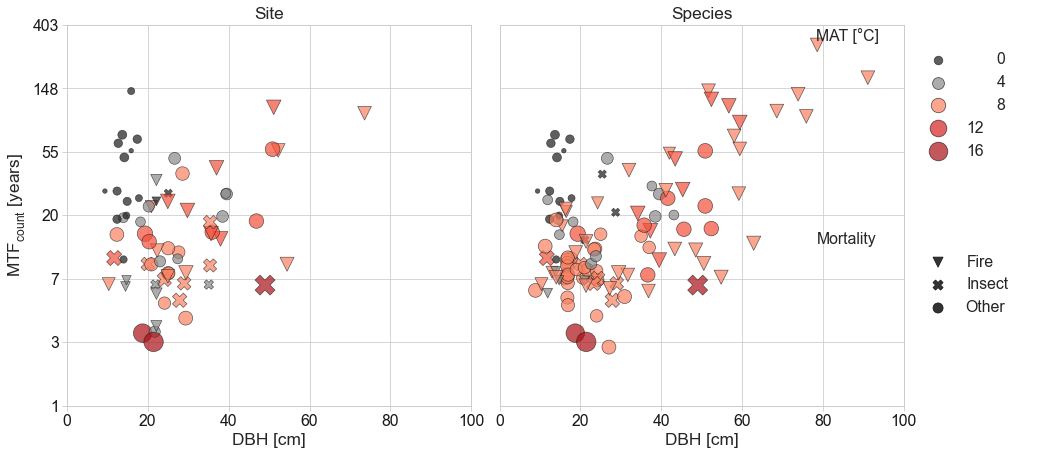

In [6]:
#---------------------------------#
#   Visualize MTF relationships   #
#---------------------------------#

x_var                 = 'DBH mean'
alpha                 = 0.7
marker_size           = (20, 400)
legend_x              = 1.01
legend_title_position = -41
legend_title_position = -151 # for soring


#--- Plot settings
sns.set_context("paper", font_scale=1.8)
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left']   = True
plt.rcParams['xtick.color']  = 'lightgrey'
plt.rcParams['ytick.color']  = 'lightgrey'

new_labels = ['MAT [°C]', '0','4','8','12','16','Mortality','Fire','Insect','Other']

mypal = sns.color_palette("Greys_r", 10)[0:2] + sns.color_palette("Reds", 6)[-4:]
mypal = [sns.color_palette("Greys_r", 10)[0]] + [sns.color_palette("Greys_r", 10)[4]]+ sns.color_palette("Reds", 6)[-4:]
cm = ListedColormap(sns.color_palette(mypal, as_cmap=True))


#--- Plot
fig, ax = plt.subplots(1,2, figsize=(15,7), sharey=True)
g = sns.scatterplot(data=mtf_site_ss,
                    hue='MAT',
                    x=x_var,
                    size='MAT',
                    y='MTF',
                    sizes=marker_size, 
                    style='Mortality',
                    style_order=['Fire', 'Insects', 'Other'],
                    markers=['v','X','o'],
                    ax=ax[0],
                    palette=cm,
                    edgecolor='k',
                    alpha=alpha
               )
g.legend_.remove()
g = sns.scatterplot(data=mtf_spe_ss,
                    hue='MAT',
                    x=x_var,
                    size='MAT',
                    y='MTF',
                    sizes=marker_size, 
                    style='Mortality',
                    style_order=['Fire', 'Insects', 'Other'],
                    markers=['v','X','o'],
                    ax=ax[1],
                    palette=cm,
                    edgecolor='k',
                    alpha=alpha
               )

y_ticks_non_log = [int(i) for i in list(np.round(np.exp(np.arange(0,7))))]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #ax[0].set_yticklabels(np.arange(0,7),color='k') # log scale y ticks
    ax[0].set_yticklabels(y_ticks_non_log,color='k')
    ax[0].set_xticklabels(np.arange(0,120,20), color='k')
    ax[1].set_xticklabels(np.arange(0,120,20), color='k')
    ax[1].yaxis.set_ticks_position('none')



# Split legend
num_of_colors   = 6
handles, labels = ax[1].get_legend_handles_labels()
color_hl = handles[:num_of_colors], labels[:num_of_colors]
sizes_hl = handles[num_of_colors:], labels[num_of_colors:]

# Call legend twice
color_leg = ax[1].legend(*color_hl,bbox_to_anchor = (legend_x, 1.03),loc = 'upper left',frameon=False
                        )
for lh in color_leg.legendHandles:  
    lh.set_edgecolor('k')
    lh.set_alpha(alpha)
c = 0
for i,j in zip(color_leg.get_texts(),new_labels[:6]):
    i.set_text(j)
    if (c == 0):
        i.set_position((legend_title_position,0))
    elif (c>0) & (c<4):
        i.set_position((30,0))
        print(i)
    c+=1    


cat_leg = ax[1].legend(*sizes_hl, bbox_to_anchor = (legend_x, 0.2),loc = 'lower left', frameon=False) 
for lh in cat_leg.legendHandles: 
    lh.set_sizes([110,110])
    lh.set_edgecolor('k')
c = 0    
for i,j in zip(cat_leg.get_texts(),new_labels[6:]):
    i.set_text(j)
    if (c == 0):
        i.set_position((legend_title_position+1,0))
    elif (c==3):
        i.set_position((-1,0))
        print(i)
    c+=1    

# We need this because the 2nd call to legend() erases the first
ax[1].add_artist(color_leg)
for lh in cat_leg.legendHandles: 
    lh.set_sizes([100,100])
    lh.set_edgecolor('k')    

#    
ax[0].set_ylim(0,6)
ax[0].set_xlim(0,100)
ax[1].set_xlim(0,100)
#ax[0].set_ylabel('log($MTF_{count}$)') # log scale
ax[0].set_ylabel('$MTF_{count}$ [years]')
ax[1].set_xlabel('DBH [cm]')
ax[0].set_xlabel('DBH [cm]')
ax[1].set_title('Species')
ax[0].set_title('Site')
ax[0].annotate(xy=(3,18.5),text='(a)',color='k')
ax[1].annotate(xy=(3,18.5),text='(b)',color='k')
plt.subplots_adjust(wspace=0.07)
fig.savefig('Figure4_logMTF_'+mtf_type+'_DBH_MAT_Mortality_scatter.png',
            bbox_extra_artists=[ax[1].legend_],
            dpi=300,bbox_inches='tight')
plt.show()